# Inferential statistics

**Add the `src` directory as one where we can import modules**

In [1]:
import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'src'))
sys.path.append(src_dir)
print(src_dir)

/home/a/Ixians/python-FU-class/10-2021-01-22/src


In [2]:
import helper_funcs as hf

**Load libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Population and Sample Statistics

[Inferential statistics](https://en.wikipedia.org/wiki/Statistical_inference) is all about using **sample results** to make decisions or predictions about a **population**. Basically, a numerical value is assigned to a population parameter based on the information collected from a sample.

### Sampling

In [ ]:
x = hf.sample_body_heights(20)
x

In [ ]:
fig, ax = plt.subplots()
ax.hist(x, bins=25);

> ### Challenge: Repeat the experiment above but this time take 20,000 samples. Save the results in the variable `heights` 
> * ### Compute and report the mean and the standard deviation of the sample. Store them in variables denoted as `xbar` and `std`, respectively.  
> * ### Plot a histogram. Describe characteristic features of the plot. 

In [ ]:
## your code here

In [ ]:
# %load ../src/_solutions/height_experiment.py

### Standardization (standard (z)-scores)

In statistics, the standard score is the signed fractional number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. Observed values above the mean have positive standard scores, while values below the mean have negative standard scores.

It is calculated by subtracting the population mean from an individual raw score and then dividing the difference by the population standard deviation.  Standard scores are also called z-values, z-scores, normal scores, and standardized variables.

$$z = \frac{X-\bar x}{s}$$

> ### Challenge: Write a function `ztrans` and implement the logic as stated above. Apply the function to the variable `heights` and plot a historgram. What changed?

In [ ]:
## your code here

In [ ]:
# %load ../src/_solutions/ztrans.py

### Normal distribution

The [**normal distribution**](https://en.wikipedia.org/wiki/Normal_distribution) is used extensively in probability theory, statistics, and the natural and social sciences. It is also called the **Gaussian distribution** because [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) (1777-1855) was one of the first to apply it for the analysis of astronomical data.

The **normal probability distribution** or the **normal curve** is a bell-shaped (symmetric) curve. Its mean is denoted by $\mu$ and its standard deviation by $\sigma$. A continuous random variable $x$ that has a normal distribution is called a **normal random variable**. 

The notation for a normal distribution is $X \sim N(\mu,\sigma)$. The probability density function (PDF) is written as 

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}.$$

The probability density function $f(x)$ gives the vertical distance between the horizontal axis and the normal curve at point $x$. 

The normal distribution is described by two parameters, the mean, $\mu$, and the standard deviation, $\sigma$. Each different set of values of $\mu$ and $\sigma$ gives a different normal distribution. The value of $\mu$ determines the center of a normal distribution curve on the horizontal axis, and the value of $\sigma$ gives the spread of the normal distribution curve. 

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm

In [ ]:
mu = 0 
sigma = 1

In [ ]:
x = np.linspace(-4, 4, 100)
y = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)

A normal distribution is characterized, among others, by the following characteristics:

1. The total area under a normal distribution curve is 1.0, or 100%.  
2. A normal distribution curve is symmetric about the mean. Consequently, 50% of the total area under a normal distribution curve lies on the left side of the mean, and 50% lies on the right side of the mean.  
3. The tails of a normal distribution curve extend indefinitely in both directions without touching
or crossing the horizontal axis. Although a normal distribution curve never meets the horizontal axis, beyond the points represented by $\mu - 3\sigma$ and $\mu + 3\sigma$ it becomes so close to this axis that the area under the curve beyond these points in both directions can be taken as virtually zero.   

#### Finding $z_\alpha$

In [ ]:
norm.ppf(0.5, loc=mu, scale=sigma)

#### Finding the area to the left of a specified $z$-score or $x$-score

In [ ]:
z = 3

In [ ]:
norm.cdf(z, loc=mu, scale=sigma)

#### Finding the area to the right of a specified $z$-score or $x$-score

In [ ]:
1 - norm.cdf(z, loc=mu, scale=sigma)

#### Finding the area inbetween two specified $z$-scores or $x$-scores

In [ ]:
norm.cdf(z, loc=mu, scale=sigma) - (1 - norm.cdf(z, loc=mu, scale=sigma))

#### Visualization

In [ ]:
hf.visualize_probabilities(p=0.2,loc=mu, scale=sigma, tails='both', figsize=(12,5))

> ### Challenge: Play around with the function `hf.visualize_probabilities` and try to reason about it. Note that you can pick among different types of tails (`lower`, `upper`, `both`, and `inbetween`).

In [ ]:
# %load ../src/_solutions/eval_visualization.py

> ### Challenge: Confirm the [Empirical Rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule), also known as the **68-95-99.7 rule**, which relates to [Chebyshev's theorem](https://en.wikipedia.org/wiki/Chebyshev%27s_theorem).
For a bell-shaped distribution the 3 rules are, that approximately
> * 68% of the observations lie within one standard deviation of the mean,
> * 95% of the observations lie within two standard deviations of the mean, and
> * 99.7% of the observations lie within three standard deviations of the mean.
> ### Compute three varialbles (`auc1`,`auc2`, and `auc3`), each ot them area under the curve for the intervals $[\mu - 1 \times \sigma, \mu + 1 \times \sigma]$, $[\mu - 2 \times \sigma, \mu + 2 \times \sigma]$ and $[\mu - 3 \times \sigma, \mu + 3 \times \sigma]$.  
_Hint: Use the `norm.cdf` function_

In [ ]:
mu = 0
sigma = 1

In [ ]:
## your code here (replace None)
auc1 = None
auc2 = None
auc3 = None
print(auc1, auc2, auc3)

In [ ]:
# %load ../src/_solutions/auc.py

In [ ]:
fig, ax = plt.subplots(figsize=(12,11), nrows=3)
for e, p in enumerate((auc1, auc2, auc3)):
    hf.visualize_probabilities(p=p, loc=mu, scale=sigma, tails='inbetween', ax=ax[e])
fig.tight_layout()

## The Central Limit Theorem

The [__central limit theorem__](https://en.wikipedia.org/wiki/Central_limit_theorem) is one of the most useful concepts in statistics. The theorem is all about drawing samples from a population. The theorem states that if one collects samples of a large enough sample size $n$, and calculates each sample’s mean (or sum, etc.), the shape of the histogram of those statistics approximates a bell shaped (normal) form. The usefulness of the central limit theorem is due to the fact, that it does not matter what the distribution of the original population is, the distribution of sample statistics follows the normal distribution.

### Sampling error

Obviously, different samples (of the same length) selected from the same population yield different sample statistics because they contain different elements. Moreover, any sample statistics obtained from any sample, such as the sample mean $\bar x$, will be different from the result obtained from the corresponding population, the population mean, $\mu$. The difference between the value of a sample statistic obtained from a sample and the value of the corresponding population parameter obtained from the population is called the **[sampling error](https://en.wikipedia.org/wiki/Sampling_error)**. In the case of the mean the sampling error can be written as 

$$\text{sampling error} = \bar x - \mu$$

Due to the nature of random sampling, and thus due to the process of drawing a set of values from the population, the resulting sampling error occurs due to chance, or in other words, the sampling error is a random variable. However, one should note that beside the described randomness there are other sources of error. These error are often related the the data generation process and are subsumed under the term [non-sampling error](https://en.wikipedia.org/wiki/Non-sampling_error). Such errors are introduced by for example human handling of the data, calibration errors of the measuring devices, among others.



In [ ]:
_, mu, sigma = hf.sample_body_heights(return_params=True)
print(mu)
print(sigma)

In [ ]:
norm.rvs(loc=mu, scale=sigma, size=1)

> ### Challenge: Compute and report the sampling error for random samples of sample sizes of 3, 30, 300 and 3000 (keep $\mu$ and $\sigma$ the same as before). 
_Hint: You may write a for-loop_

>_Reminder: $$\text{sampling error} = \bar x - \mu$$_

In [ ]:
## your code here

In [ ]:
# %load ../src/_solutions/sample_error.py

### The sampling distribution

Based upon our intuition of randomness in the sampling process, we introduce the **[Sampling Distribution](https://en.wikipedia.org/wiki/Sampling_distribution)**. The sampling distribution is a distribution of a sample statistic. Often the name of the computed statistic is added as part of the title. For example, if the computed statistic was the sample mean, the sampling distribution would be titled **the sampling distribution of the sample mean**.




The more often we take a sample the better the relative frequency distribution of the sample statistics approximates the sampling distribution. Or in other words, as the number of samples approaches infinity, the resulting frequency distribution will approach the sampling distribution. The sampling distribution should not be confused with a sample distribution: the latter describes the distribution of values (elements) in one particular sample. 

#### Data comming from a normally distributed random variable

In [ ]:
n = 25
mu = 100
sigma = 13
samples = 10000

In [ ]:
mu_xs = []
for sample in range(samples):
    x = norm.rvs(loc=mu, scale=sigma, size=n)
    xbar = np.mean(x)
    mu_xs.append(xbar)

print(f'True mu: {mu}, mean of the sampling distribution: {np.mean(mu_xs)}')

In [ ]:
import seaborn as sns
sns.distplot(mu_xs, hist=True, kde=True)

#### Data comming from a not normally distribited random variable

In [ ]:
from scipy.stats import expon
fig, ax = plt.subplots()
lambda_ = 17
ax.hist(expon.rvs(size=1000, loc=0, scale=lambda_));

In [ ]:
n = 25
samples = 10000

In [ ]:
mu_xs = []
for sample in range(samples):
    x = expon.rvs(size=n, loc=0, scale=lambda_)
    xbar = np.mean(x)
    mu_xs.append(xbar)

print(f'True lambda: {lambda_}, mean of the sampling distribution: {np.mean(mu_xs)}')

In [ ]:
sns.distplot(mu_xs, hist=True, kde=True)

> ### Challenge: Experiment with differnt sample sizes `n`. At which sample size does the sampling distribution approximate a normal distribution?

### The standard error

Just as the population distributions can be described with parameters, so can the sampling distribution. The expected value (mean) of any distribution can be represented by the symbol $\mu$ (mu). In the case of the sampling distribution, the mean, $\mu$, is often written with a subscript to indicate which sampling distribution is being described. For example, the expected value of the sampling distribution of the mean is represented by the symbol $\mu_{\bar x}$. The value of $\mu_{\bar x}$ can be thought of as the theoretical mean of the distribution of sample means.

If we pick a large enough number samples (of the same size) from a population and calculate their means, then the mean ($\mu_{\bar x}$ ) of all these sample means will approximate the mean ($\mu$) of the population. That is why the the sample mean $\bar x$, is called an estimator of the population mean, $\mu$. Thus, the mean of the sampling distribution is equal to the mean of the population. 

$$\mu_{\bar x} = \mu$$


The standard deviation of a sampling distribution is given a special name, the [**standard error**](https://en.wikipedia.org/wiki/Standard_error). The standard error of the sampling distribution of a statistic, denoted as $\sigma_{\bar x}$, describes the degree to which the computed statistics may be expected to differ from one another when calculated from a sample of similar size and selected from similar population models. The larger the standard error of a given statistic, the greater the differences between the computed statistics for the different samples (Lovric 2010). 

However, please note that the standard error, $\sigma_{\bar x}$, is not equal to the standard deviation, $\sigma$, of the population distribution (unless $n = 1$). The standard error is equal to the standard deviation of the population divided by the square root of the sample size:


$$ \sigma_{\bar x} = \frac{\sigma}{\sqrt{n}}$$


This equation holds true only when the sampling is done either with replacement from a finite population or with or without replacement from an infinite population. Which corresponds to the condition that the sample size $(n)$ is small in comparison to the population size $(N)$. The sample size is considered to be small compared to the population size if the sample size is equal to or less than 5% of the population size that is, if

$$ \frac{n}{N} \le 0.05$$

If this condition is not satisfied, the following equation is used to calculate $\sigma_{\bar x}$:

$$ \sigma_{\bar x} = \frac{\sigma}{\sqrt{n}}\sqrt{\frac{N-n}{N-1} }$$

In most practical applications, however, the sample size is small compared to the population size. 


In [ ]:
def standard_error(mu_xs, n):
    sigma = np.std(mu_xs)
    return sigma/np.sqrt(n)

In [ ]:
standard_error(mu_xs=mu_xs, n=n)

## Point Estimate and Confidence Interval

Given a sample, the value of the computed sample statistic gives a point estimate of the corresponding population parameter. For example, the sample mean $(\bar x)$, is a point estimate of the corresponding population mean, $\mu$, or the sample standard deviation $s$ is a point estimate for the population standard deviation $\sigma$. 

* [__sampling error__](https://en.wikipedia.org/wiki/Sampling_error) (the point estimate almost always differs from the true value of the population)


### Interval Estimate 

Instead of assigning a single value to a population parameter, an interval estimation gives a probabilistic statement, relating the given interval to the probability that this interval actually contains the true (unknown) population parameter.


The level of confidence is chosen a priori and thus depends on the users preferences. It is denoted by

$$100(1-\alpha)$$

Although any value of confidence level can be chosen, the most common values are 90%, 95%, and 99%. When expressed as probability, the confidence level is called the confidence coefficient and is denoted by (1−$\alpha$). Most common confidence coefficients are 0.90, 0.95, and 0.99, respectively.

A 100(1−$\alpha$)% confidence interval is an interval estimate around a population parameter $\theta$ (here, the Greek letter $\theta$ is a placeholder for any population parameter of interest such as the mean $\mu$, or the standard deviation $\sigma$, among others) that, under repeated random samples of size $N$, is expected to include $\theta$'s true value 100(1−$\alpha$)%  of the time.

The actual number added to and subtracted from the point estimate is called the margin of error.

$$CI:\text{Point estimate} \pm \text{Margin of error (ME)}$$


Thus, the margin of error (ME) is expressed as


$$ME = t^*_{\text{df;}\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$$

### Confidence interval the hard way

#### Procedure
##### 1. Compute the sample mean (`xbar`)
##### 2. Compute the t-score (`t_`) for $\alpha = 0.05$ and $df=n-1$
##### 3. As $\sigma$ is unknown compute the standard devitation of the sample `s`
##### 4. Compute the margin of error (`me`) as $ME = t^*_{\text{df;}\alpha/2} \times \frac{\sigma}{\sqrt{n}}$
##### 5. Compute the lower and upper 95% confidence interval as $CI:\text{Point estimate} \pm \text{Margin of error (ME)}$

#### Load the data set

Source [Crowder, M. and Hand, D. (1990)](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/ChickWeight.html)

In [4]:
chicken, chick_diet1, chick_diet2, chick_diet3, chick_diet4 = hf.load_chicken()

In [5]:
chicken

,Chick,Diet,weight
0,1,1,112
1,2,1,120
2,3,1,116
3,4,1,99
4,5,1,127
5,6,1,114
6,7,1,150
7,8,1,92
8,9,1,81
9,10,1,83


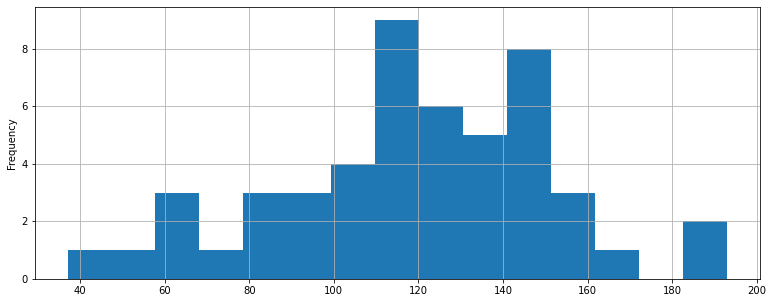

In [6]:
chicken["weight"].plot.hist(figsize=(13,5), bins=15)
plt.grid();

#### 1. Compute the sample mean (`xbar`)

In [ ]:
## your code here

In [8]:
# %load ../src/_solutions/ci_1.py
xbar = chicken.weight.mean()
xbar

119.28

#### 2. Compute the t-score (`t_`) for $\alpha = 0.05$ and $df=n-1$ 
_Hint: use the `t.ppf` function_

In [ ]:
from scipy.stats import t

In [ ]:
## your code here

In [10]:
# %load ../src/_solutions/ci_2.py
from scipy.stats import t
alpha = 0.05
lower_t = t.ppf(alpha/2, df=chicken.shape[0]-1)
upper_t = t.ppf(1-alpha/2, df=chicken.shape[0]-1)
print(lower_t, upper_t)

t_ = abs(lower_t) 
t_

-2.0095752344892093 2.009575234489209


2.0095752344892093

#### 3. As $\sigma$ is unknown compute the standard devitation of the sample `s`

In [ ]:
## your code here

In [12]:
# %load ../src/_solutions/ci_3.py
simga = s =  chicken.weight.std()
s

33.048535735879646

#### 4. Compute the margin of error (`me`) as 
>$ME = t^*_{\text{df;}\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$

In [ ]:
## your code here

In [14]:
# %load ../src/_solutions/ci_4.py
me = t_ * (s/np.sqrt(chicken.shape[0]))
me

9.392289922536362

#### 5. Compute the lower and upper 95% confidence interval as $CI:\text{Point estimate} \pm \text{Margin of error (ME)}$

In [ ]:
## your code here

In [16]:
# %load ../src/_solutions/ci_5.py
lower_ci = xbar - me
upper_ci = xbar + me

(print("We are {}% confident that the true weight of chicken is between {} and {} grams.".
       format((1-alpha)*100, lower_ci, upper_ci)))

We are 95.0% confident that the true weight of chicken is between 109.88771007746364 and 128.67228992253635 grams.


### Confidence intervals the easy way using `statsmodels`

[statsmodels](http://www.statsmodels.org/dev/index.html#) is a Python module that provides classes and functions for the estimation of many different **statistical models**, as well as for conducting **statistical tests**, and **statistical data exploration**.


* Regression Analysis
* Linear Mixed Effects Models
* ANOVA
* Time Series analysis
* Parametric and Nonparametric Statistical Methods
* Multivariate Statistics multivariate
* Distributions
* and many more...


In [18]:
from statsmodels.stats.weightstats import DescrStatsW
d_stats = DescrStatsW(chicken["weight"])
type(d_stats)

statsmodels.stats.weightstats.DescrStatsW

In [19]:
d_mean = d_stats.mean
d_mean

119.28

In [20]:
alpha = 0.05
d_conf_int = d_stats.tconfint_mean(alpha=alpha) 
print(d_conf_int)

(109.88771007746364, 128.67228992253635)


## Bootstrapping

[Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) relies on random sampling with replacement. It allows assigning measures of accuracy (defined in terms of bias, variance, confidence intervals, prediction error or some other such measure) to sample estimates. This technique allows estimation of the sampling distribution of almost any statistic using random sampling methods.

> ### Challenge: Write a function `bootstrap(df, var, n_bootstrap, alpha=0.05)` and implement bootstrapping to compute the confidence intervalls around the mean for the chicken data set. 


**Pseudocode:**
    
**1. Calculate a Population of Statistics**


    statistics = []
    for i in bootstraps:    
        sample = select_sample_with_replacement(data)
        stat = calculate_statistic(sample)
        statistics.append(stat)
    
**2. Calculate Confidence Interval**

    ordered = sort(statistics)
    lower, upper = quantile(ordered, [alpha/2, 1-alpha/2])
    
    

In [ ]:
## your code here ...

def bootstrap(df, var, n_bootstrap, alpha=0.05):
    pass

In [ ]:
# %load ../src/_solutions/bootstrap.py

In [ ]:
bootstrap(df=chicken, var="weight", n_bootstrap=10000, alpha=0.05) 

## Hypothesis Testing

A very common problem that scientists face is the assessment of significance in scattered statistical data. Owing to the limited availability of observational data, scientists apply **inferential statistical methods to decide if the observed data contains significant information or if the scattered data is nothing more than the manifestation of the inherently probabilistic nature of the data generation process**.

The framework of hypothesis testing is all about making statistical inferences about populations based on samples taken from the population. Any hypothesis test involves the **collection of data (sampling)**. If the **hypothesis** is assumed to be correct, the scientist can calculate the **expected results** of an experiment. If the **observed data** differs significantly from the expected results, then one considers the assumption to be incorrect. Thus, based on the observed data the scientist makes a **decision** as to whether or not there is sufficient evidence, based upon analyses of the data, that the model - the hypothesis - should be rejected, or that there is not sufficient evidence to reject the stated hypothesis.

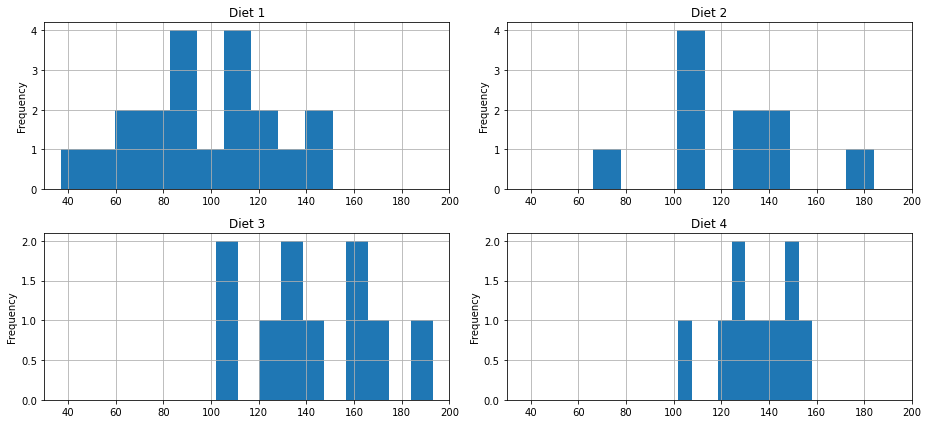

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13,6))
ax = axes.ravel()
for e, diet in enumerate(chicken.Diet.unique()):
    chicken.loc[chicken.Diet==diet,"weight"].plot.hist(ax=ax[e])
    ax[e].grid()
    ax[e].set_title("Diet {}".format(diet))
    ax[e].set_xlim(30, 200)
plt.tight_layout()

In [22]:
chicken.groupby("Diet")["weight"].mean() 

Diet
1     98.05
2    122.50
3    143.00
4    134.80
Name: weight, dtype: float64

In [23]:
def compute_ci(df, group, var, alpha=0.05):
    groups = df[group].unique()
    rv = pd.DataFrame({"group":None, 
                       "mean":None,
                       "lower_ci":None,
                       "upper_ci":None}, 
                      index=range(len(groups)))
    for e, g in enumerate(groups):        
        stats = DescrStatsW(df.loc[df[group] == g, var])
        group_mean = stats.mean
        group_ci = stats.tconfint_mean(alpha=alpha) 
        rv.loc[e] = {"group":g, 
                     "mean":group_mean,
                     "lower_ci":group_ci[0],
                     "upper_ci":group_ci[1]}
    return rv
        
group_stats = compute_ci(df=chicken, group="Diet", var="weight")    
group_stats

,group,mean,lower_ci,upper_ci
0,1.0,98.05,83.497144,112.602856
1,2.0,122.5,100.034174,144.965826
2,3.0,143.0,123.426566,162.573434
3,4.0,134.8,123.168024,146.431976


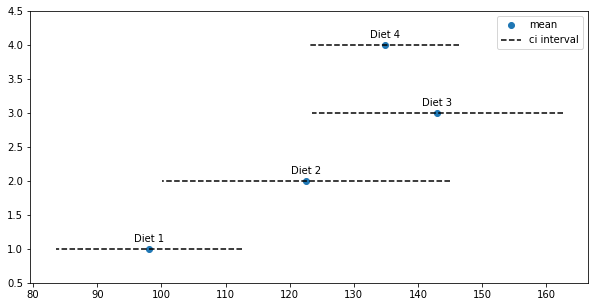

In [24]:
groups = group_stats["group"].values

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(group_stats["mean"].values, groups, "o")
ax.set_ylim(0.5,4.5)

for e,i in enumerate(group_stats["group"]):
    mean = group_stats["mean"].values[e]
    upper = group_stats["upper_ci"].values[e]
    lower = group_stats["lower_ci"].values[e]
    ax.plot((upper, lower),
            (i,i), "k--")
    ax.text(mean,i+0.1, "Diet "+str(int(i)), horizontalalignment='center')
ax.legend(["mean", "ci interval"]);

### Testing for differences in the mean (t-test)

* variables normally distributed and independent
* variance equal or not

Null hypothesis
$H_0:\quad \mu_1 = \mu_2$

Alternative hypothesis
$H_A:\quad \mu_1 \ne \mu_2$


In [25]:
from statsmodels.stats.weightstats import ttest_ind

In [26]:
t, p, degf = ttest_ind(chick_diet2, chick_diet3)
p

0.13702894396508203

> ### Challenge: Try out all combinations of `chick_diet1`, `chick_diet2`, `chick_diet3` and `chick_diet4` and report the $p$ value

In [ ]:
## your code here

In [ ]:
# %load ../src/_solutions/chicken_pval.py

## Multiple comparisons

The problem with multiple comparisons is that the more hypotheses are tested on a particular data set, the more likely it is to incorrectly reject the null hypothesis. Thus, methods of multiple comparison require a higher significance threshold ($\alpha$) for individual comparisons, in order to compensate for the number of inferences being made.


**The Family-wise error rate**

The family-wise error rate is the probability of making one or more false discoveries, or [__Type I errors__](https://2378nh2nfow32gm3mb25krmuyy-wpengine.netdna-ssl.com/wp-content/uploads/2014/05/Type-I-and-II-errors1-625x468.jpg) when performing multiple hypotheses tests.

Recall that at a significance level of $\alpha=0.05$, the probability of making a Type I error is equal to $0.05$ or $5\%$. Consequently, the probability of not making a Type I error is $1-\alpha=1-0.05=0.95$.


Written more formally, for a family of $C$ tests, the probability of making a Type I error for the whole family is

$$(1-\alpha)^C\text{.}$$

Let us now consider $C=4$ and $\alpha=0.05$.

Thus, if we make 4 multiple comparisons on one data set, the probability of not making one or more Type I errors on the family of tests is $(1-\alpha)^C = (1−0.05)^4 = 0.81$


Null hypothesis
$H_0:\quad \mu_1 = \mu_2 = \mu_3 = \mu_4$

Alternative hypothesis
$H_A:\quad \mu_1 \ne \mu_2 \ne \mu_3 \ne \mu_4$


**[Tukey's HSD (Honestly Significant Difference)](https://en.wikipedia.org/wiki/Tukey%27s_range_test)**

In [ ]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
mult_comp = MultiComparison(data=chicken["weight"], groups=chicken["Diet"])
mult_comp.tukeyhsd(alpha=0.05).summary()

In [ ]:
_ = mult_comp.tukeyhsd(alpha=0.05).plot_simultaneous()

***